In [1]:
#import sys
#!{sys.executable} -m pip install -r requirements.txt
#!{sys.executable} -m pip install importlib
#import time
#import matplotlib.pyplot as plt
#from inverse_thomson_scattering.v0 import form_factor as np_ff
#from inverse_thomson_scattering.jax import form_factor as jnp_ff
#from inverse_thomson_scattering.utils import plotting
import numpy as np
from scipy import special as sp
from importlib import reload

In [2]:
x = np.array(np.arange(-8, 8, 0.1))

# distf = 1 / (2 * np.pi) ** (1 / 2) * np.exp(-(x**5) / 2)
m = 2
const = np.sqrt(3*sp.gamma(3./m)/sp.gamma(5./m))
distf = np.exp(-(np.abs(x/const)**m))

norm = np.trapz(distf) * (x[2]-x[1])
distf = distf/norm

sa = np.linspace(55, 65, 10)

In [3]:
import yaml
with open("./inputs.yaml", "r") as fi:
  yaml_dict = yaml.safe_load(fi)

print(yaml_dict)

{'amp1': {'val': 1.0, 'active': True, 'lb': 0.0, 'ub': 10.0}, 'amp2': {'val': 1.0, 'active': True, 'lb': 0.0, 'ub': 10.0}, 'lam': {'val': 526.5, 'active': True, 'lb': 523.0, 'ub': 528.0}, 'Te': {'val': 0.5, 'active': True, 'lb': 0.01, 'ub': 3.0}, 'Z': {'val': 1.0, 'active': False, 'lb': 1.0, 'ub': 25.0}, 'ne': {'val': 0.2, 'active': True, 'lb': 0.001, 'ub': 10.0}, 'm': {'val': 2.0, 'active': True, 'lb': 2.0, 'ub': 5.0}, 'fe': {'val': [], 'active': False, 'length': 64, 'type': 'DLM', 'lb': -100.0, 'ub': -0.5}, 'blur': {'val': [], 'active': False, 'lb': 0.0, 'ub': 10.0}, 'specCurvature': {'val': [], 'active': False, 'lb': 0.1, 'ub': 10.0}, 'fitprops': {'val': [], 'active': False}}


In [4]:
from inverse_thomson_scattering.v0 import ThomsonInputs
#TSnull=ThomsonInputs.ThomsonInputs(526.5,.2,.5,2,1,1,1,'DLM')
#TSnull.ne['Active']=1
#TSnull.Te['Active']=1
TSnull=ThomsonInputs.ThomsonInputs(0,526.5,1,.2,1,.5,1,2,1,1,1,1,0,1)
TSnull.fe['Type']='DLM'
TSnull.disp()

Te :  0.5
amp1 :  1
amp2 :  1
m :  2
ne :  0.2


992817.1961596006
992817.1960122802
amp1 :  0.9941505894387666
amp2 :  0.6189797105951858
lam :  525.613211991711
Te :  0.47623013342678766
ne :  0.2335739713292179
m :  2.6677122653580083


{'amp1': {'val': 0.9941505894387666, 'active': True, 'lb': 0.0, 'ub': 10.0},
 'amp2': {'val': 0.6189797105951858, 'active': True, 'lb': 0.0, 'ub': 10.0},
 'lam': {'val': 525.613211991711, 'active': True, 'lb': 523.0, 'ub': 528.0},
 'Te': {'val': 0.47623013342678766, 'active': True, 'lb': 0.01, 'ub': 3.0},
 'Z': {'val': 1.0, 'active': False, 'lb': 1.0, 'ub': 25.0},
 'ne': {'val': 0.2335739713292179, 'active': True, 'lb': 0.001, 'ub': 10.0},
 'm': {'val': 2.6677122653580083, 'active': True, 'lb': 2.0, 'ub': 5.0},
 'fe': {'val': array([-42.86622206, -42.8138641 , -42.76160026, ..., -42.76160026,
         -42.8138641 , -42.86622207]),
  'active': False,
  'length': 64,
  'type': 'DLM',
  'lb': array([-100., -100., -100., -100., -100., -100., -100., -100., -100.,
         -100., -100., -100., -100., -100., -100., -100., -100., -100.,
         -100., -100., -100., -100., -100., -100., -100., -100., -100.,
         -100., -100., -100., -100., -100., -100., -100., -100., -100.,
         -100.,

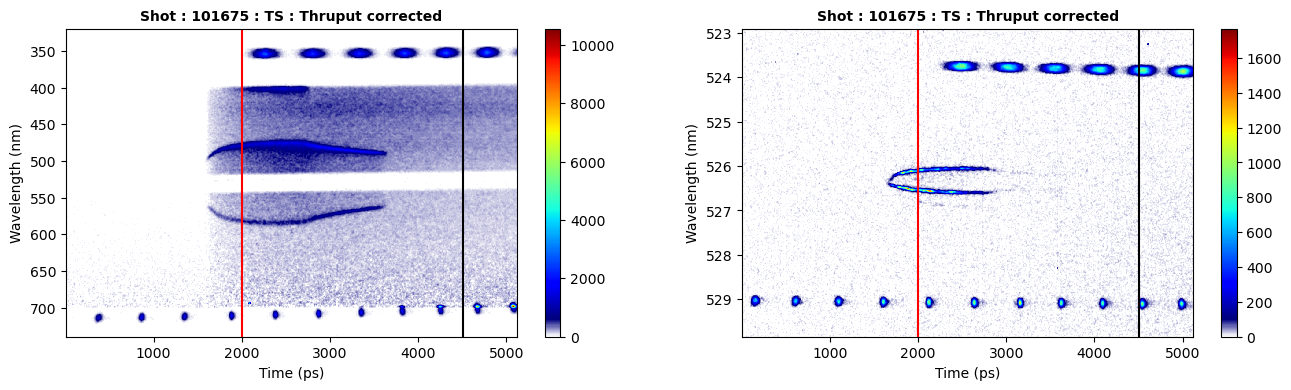

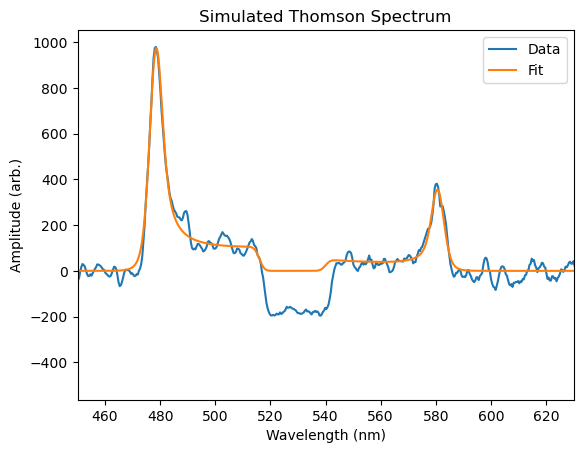

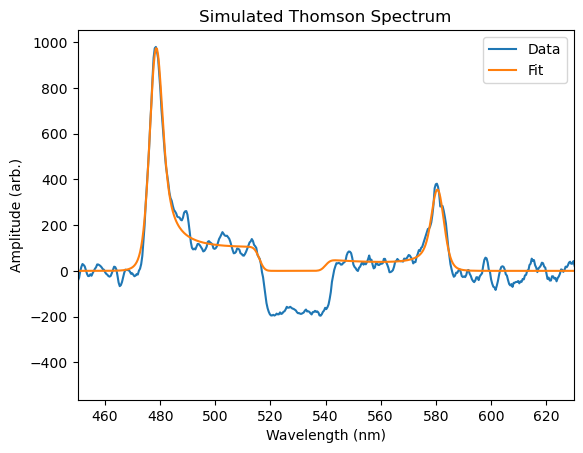

In [11]:
from inverse_thomson_scattering.v0 import datafitter
datafitter=reload(datafitter)
bgshot={'type': [], 'val': []}
lnout={'type': 'ps', 'val': 2000}
bglnout={'type': 'pixel', 'val': 900}
extraoptions={'spectype': 2}
[_]=datafitter.dattafitter(101675,bgshot,lnout,bglnout,1,2,yaml_dict,extraoptions)

In [ ]:
test= dict([])
test['type']='shot'
test['val']=123
test2= dict([])
test['test2']=test2
print(test['test'+str(2)])
print(test['test2'])


In [ ]:
print(test['test2'])
test2['type']='shot'
print(test['test2'])

In [ ]:
def test3(*args):
    print(args[2])
test3(1,2,3)

In [ ]:
a=np.array([1,2,3,4])
b=np.array([[1],[2]])
b=np.append(b,b,axis=1)
print(a)
print(b)
c= a < 3
print(a[c])

In [ ]:
a=np.ones([2,5])
b=np.array([[-100],[-.5]])
print(a*b)
print(np.shape(a*b)[1])
print(type(a)=='np.ndarray')
print(isinstance(a,np.ndarray))

In [ ]:
a=tuple([1,(3999,)])
print(a[1:])

In [ ]:
if [1, 2]: print('True')

In [ ]:
a=np.arange(2048)
a=a.reshape(-1,1024)
print(a)
print(np.shape(a[0,:]))
b=np.average(a, axis=1)
print(b)

In [ ]:
a=[]
np.shape(a)
if np.shape(a)[0]==0: print('empty')

In [ ]:
x=np.arange(6)
a = x < 4
print(a)
b = x > 2
print(b)
c = (a & b)
print(c)

In [ ]:
a=[];b=[]
print( a)